# Final Project: Data in Hand
## Delaney Curran
### 12/01/2022

In [ ]:
import pandas as pd
import numpy as np
#from sklearn import linear_model
import requests
from nba_api.stats import endpoints
from matplotlib import pyplot as plt
from scipy import stats
import json

In [27]:
from nba_api.stats.static import teams

nba_teams = teams.get_teams()
print('Number of teams fetched: {}'.format(len(nba_teams)))
nba_teams[:30]

Number of teams fetched: 30


[{'id': 1610612737,
  'full_name': 'Atlanta Hawks',
  'abbreviation': 'ATL',
  'nickname': 'Hawks',
  'city': 'Atlanta',
  'state': 'Atlanta',
  'year_founded': 1949},
 {'id': 1610612738,
  'full_name': 'Boston Celtics',
  'abbreviation': 'BOS',
  'nickname': 'Celtics',
  'city': 'Boston',
  'state': 'Massachusetts',
  'year_founded': 1946},
 {'id': 1610612739,
  'full_name': 'Cleveland Cavaliers',
  'abbreviation': 'CLE',
  'nickname': 'Cavaliers',
  'city': 'Cleveland',
  'state': 'Ohio',
  'year_founded': 1970},
 {'id': 1610612740,
  'full_name': 'New Orleans Pelicans',
  'abbreviation': 'NOP',
  'nickname': 'Pelicans',
  'city': 'New Orleans',
  'state': 'Louisiana',
  'year_founded': 2002},
 {'id': 1610612741,
  'full_name': 'Chicago Bulls',
  'abbreviation': 'CHI',
  'nickname': 'Bulls',
  'city': 'Chicago',
  'state': 'Illinois',
  'year_founded': 1966},
 {'id': 1610612742,
  'full_name': 'Dallas Mavericks',
  'abbreviation': 'DAL',
  'nickname': 'Mavericks',
  'city': 'Dallas',

In [36]:
from nba_api.stats.static import teams
nba_teams = teams.get_teams()

cavs = [team for team in nba_teams if team['abbreviation'] == 'CLE'][0]
cavs_id = cavs['id']

In [37]:
cavs

{'id': 1610612739,
 'full_name': 'Cleveland Cavaliers',
 'abbreviation': 'CLE',
 'nickname': 'Cavaliers',
 'city': 'Cleveland',
 'state': 'Ohio',
 'year_founded': 1970}

In [42]:
#from nba_api.stats.endpoints import leaguegamefinder
from nba_api.stats.library.parameters import SeasonAll

cavs_games = leaguegamefinder.LeagueGameFinder(team_id_nullable=cavs_id).get_data_frames()[0]

In [58]:
cavs_games.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22022,1610612739,CLE,Cleveland Cavaliers,0022200312,2022-11-30,CLE vs. PHI,W,240,113,...,0.800,6,34,40,28,10,3,18,13,28.0
1,22022,1610612739,CLE,Cleveland Cavaliers,0022200303,2022-11-28,CLE @ TOR,L,240,88,...,0.813,13,34,47,21,7,3,9,18,-12.0
2,22022,1610612739,CLE,Cleveland Cavaliers,0022200295,2022-11-27,CLE @ DET,W,241,102,...,0.848,10,31,41,14,3,4,14,20,8.0
3,22022,1610612739,CLE,Cleveland Cavaliers,0022200280,2022-11-25,CLE @ MIL,L,239,102,...,0.846,10,31,41,12,9,2,9,17,-15.0
4,22022,1610612739,CLE,Cleveland Cavaliers,0022200261,2022-11-23,CLE vs. POR,W,241,114,...,0.870,11,28,39,22,4,4,16,14,18.0


In [55]:
minuts = stats.describe(cavs_games['MIN'])
minuts

DescribeResult(nobs=3549, minmax=(46, 315), mean=240.54747816286277, variance=135.46878521126203, skewness=-5.296854950787475, kurtosis=92.21863025747574)

In [63]:
ast = stats.describe(cavs_games['AST'])
ast

DescribeResult(nobs=3549, minmax=(3, 45), mean=22.552550014088474, variance=33.49815372671153, skewness=0.32425198010570455, kurtosis=0.35549190198340064)

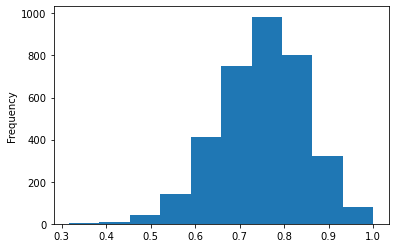

In [47]:
FT_PCT = cavs_games['REB'].plot.hist()
plt.show()

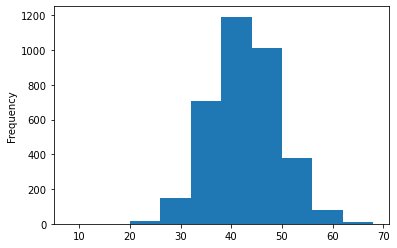

In [59]:
Reb = cavs_games['REB'].plot.hist()
plt.show()

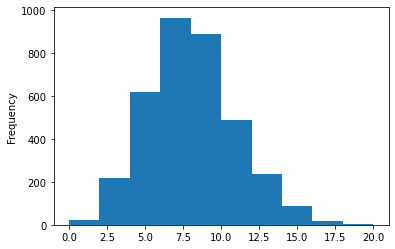

In [61]:
STL = cavs_games['STL'].plot.hist()
plt.show()

This is the data set that I will be working with for the final project. I am looking at Cleveland cavalier games from all seasons. I did some simple summaries so I can get the gist of the data set. One thing that I need to figure out is how to look at wins and losses because they are categorized as "W" and "L". I think that this data set is a good start for this project. I also used the help of https://github.com/swar/nba_api to understand how the NBA API works.